In [2]:
cd ..

C:\Users\giaco\thesis-sbp-abm\municipality_level_analysis\municipalities_abm


In [3]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import os
import csv

from municipalities_abm.model import SBPAdoption

from municipalities_abm.custom_transformers import (
    TransformCensusFeatures,
    TransformClimateFeatures,
    TransformSoilFeatures,
    )

In [4]:
%matplotlib inline

mpl.rc('axes', labelsize=14)

tick_size = 11
mpl.rc('xtick', labelsize=tick_size)
mpl.rc('ytick', labelsize=tick_size)

In [5]:
# Line necessary to import agents in model, since the cwd of the notebook server is always the base path where you started the 
# server 
import sys
sys.path.append(".\municipalities_abm")

In [6]:
# How to display floats
pd.options.display.float_format = '{:.6f}'.format
#np.set_printoptions(precision=6)
np.set_printoptions(formatter={'float': lambda x: "{0:0.6f}".format(x)})

In [7]:
# Where to save the figures
PROJECT_ROOT_DIR = "carbon_sequestration"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=False, fig_extension="jpeg", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Real data loading

In [8]:
path_to_adoption_port_real = "./carbon_sequestration/data/SBP yearly adoption - Portugal.csv"
yearly_adoption_portugal_real = pd.read_csv(path_to_adoption_port_real, index_col=0)
yearly_adoption_portugal_real.drop(1995, inplace=True)

# Model runs and data collection

In [9]:
n_runs = 100

In [10]:
def collect_data_run(model, n_run, df):  
    # Aggregate adoption
    aggr_adoption_out = model.datacollector.get_model_vars_dataframe()
    aggr_adoption_out.set_index('Year', inplace=True)
    col_name = 'Run ' + str(n_run+1)
    df[col_name] = aggr_adoption_out['Area sown in the last year [ha/y]']

## Model with payments from 2013 to 2020

In [11]:
start_year = 2013
stop_year = 2021

In [12]:
years = np.arange(start_year, stop_year)

In [13]:
# Set dataframes to collect yearly adoption in Portugal with payments
yearly_adoption_portugal_pred = pd.DataFrame(index=years)
yearly_adoption_portugal_pred.index.rename('Year', inplace=True)

In [14]:
%%time

for i in range(n_runs):
    model = SBPAdoption(initial_year=start_year, seed=i)
    for y in range(start_year, stop_year):
        model.step()
        print("Run n° " + str(i+1) + ": year " + str(y) + " step completed.")
    collect_data_run(model, i, yearly_adoption_portugal_pred)

Negative adoption predicted of: [-0.002996]
Negative adoption predicted of: [-0.001991]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Run n° 1: year 2013 step completed.
Run n° 1: year 2014 step completed.
Negative adoption predicted of: [-0.000021]
Negative adoption predicted of: [-0.000642]
Run n° 1: year 2015 step completed.
Run n° 1: year 2016 step completed.
Run n° 1: year 2017 step completed.
Run n° 1: year 2018 step completed.
Run n° 1: year 2019 step completed.
Run n° 1: year 2020 step completed.
Negative adoption predicted of: [-0.002996]
Negative adoption predicted of: [-0.001991]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative

Run n° 12: year 2013 step completed.
Run n° 12: year 2014 step completed.
Run n° 12: year 2015 step completed.
Run n° 12: year 2016 step completed.
Run n° 12: year 2017 step completed.
Run n° 12: year 2018 step completed.
Run n° 12: year 2019 step completed.
Run n° 12: year 2020 step completed.
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.001831]
Negative adoption predicted of: [-0.001991]
Negative adoption predicted of: [-0.002748]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Run n° 13: year 2013 step completed.
Run n° 13: year 2014 step completed.
Negative adoption predicted of: [-0.000394]
Negative adoption predicted of: [-0.000051]
Negative adoption predicted of: [-0.000291]
Run n° 13: year 2015 step completed.
Run n° 13: year 2016 

Run n° 23: year 2018 step completed.
Run n° 23: year 2019 step completed.
Run n° 23: year 2020 step completed.
Negative adoption predicted of: [-0.006985]
Negative adoption predicted of: [-0.002996]
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.002748]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Negative adoption predicted of: [-0.002490]
Run n° 24: year 2013 step completed.
Run n° 24: year 2014 step completed.
Run n° 24: year 2015 step completed.
Run n° 24: year 2016 step completed.
Run n° 24: year 2017 step completed.
Run n° 24: year 2018 step completed.
Run n° 24: year 2019 step completed.
Run n° 24: year 2020 step completed.
Negative adoption predicted of: [-0.002996]
Negative adoption pre

Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Negative adoption predicted of: [-0.002490]
Run n° 35: year 2013 step completed.
Run n° 35: year 2014 step completed.
Run n° 35: year 2015 step completed.
Run n° 35: year 2016 step completed.
Run n° 35: year 2017 step completed.
Run n° 35: year 2018 step completed.
Run n° 35: year 2019 step completed.
Run n° 35: year 2020 step completed.
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.002490]
Run n° 36: year 2013 step completed.
Run n° 36: year 2014 step completed.
Negative adoption predicted of: [-0.000118]
Run n° 36: year 2015 step completed.
Run n° 36: year 2016 step completed.
Run n° 36: year 2017 step completed.
Run n° 36: year 2018 step completed.
Run n° 36: year 2019 step completed.
Run n° 36: year 2020 step completed.
Negative ado

Run n° 46: year 2016 step completed.
Run n° 46: year 2017 step completed.
Run n° 46: year 2018 step completed.
Run n° 46: year 2019 step completed.
Run n° 46: year 2020 step completed.
Negative adoption predicted of: [-0.002996]
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.005195]
Run n° 47: year 2013 step completed.
Run n° 47: year 2014 step completed.
Run n° 47: year 2015 step completed.
Run n° 47: year 2016 step completed.
Run n° 47: year 2017 step completed.
Run n° 47: year 2018 step completed.
Run n° 47: year 2019 step completed.
Run n° 47: year 2020 step completed.
Negative adoption predicted of: [-0.002996]
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.001991]
Negative adoption predicted of: [-0

Negative adoption predicted of: [-0.001639]
Run n° 58: year 2013 step completed.
Run n° 58: year 2014 step completed.
Run n° 58: year 2015 step completed.
Run n° 58: year 2016 step completed.
Run n° 58: year 2017 step completed.
Run n° 58: year 2018 step completed.
Run n° 58: year 2019 step completed.
Run n° 58: year 2020 step completed.
Negative adoption predicted of: [-0.001831]
Negative adoption predicted of: [-0.001991]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Negative adoption predicted of: [-0.002490]
Run n° 59: year 2013 step completed.
Run n° 59: year 2014 step completed.
Run n° 59: year 2015 step completed.
Run n° 59: year 2016 step completed.
Run n° 59: year 2017 step completed.
Run n° 59: year 2018 step completed

Run n° 70: year 2013 step completed.
Run n° 70: year 2014 step completed.
Negative adoption predicted of: [-0.000496]
Run n° 70: year 2015 step completed.
Run n° 70: year 2016 step completed.
Run n° 70: year 2017 step completed.
Run n° 70: year 2018 step completed.
Run n° 70: year 2019 step completed.
Run n° 70: year 2020 step completed.
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.002490]
Run n° 71: year 2013 step completed.
Run n° 71: year 2014 step completed.
Run n° 71: year 2015 step completed.
Run n° 71: year 2016 step completed.
Run n° 71: year 2017 step completed.
Run n° 71: year 2018 step completed.
Run n° 71: year 2019 step completed.
Run n° 71: year 2020 step completed.
Negative adoption predicted of: [-0.002996]
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.002748]
Negative ado

Run n° 81: year 2020 step completed.
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.002748]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Run n° 82: year 2013 step completed.
Run n° 82: year 2014 step completed.
Run n° 82: year 2015 step completed.
Run n° 82: year 2016 step completed.
Run n° 82: year 2017 step completed.
Run n° 82: year 2018 step completed.
Run n° 82: year 2019 step completed.
Run n° 82: year 2020 step completed.
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.001831]
Negative adoption predicted of: [-0.002748]
Negative adoption predicted of: [-0.003394]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.001161]
Negative adoption predicted of: [-0.003091]
Negativ

Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.005185]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Run n° 94: year 2013 step completed.
Run n° 94: year 2014 step completed.
Run n° 94: year 2015 step completed.
Run n° 94: year 2016 step completed.
Run n° 94: year 2017 step completed.
Run n° 94: year 2018 step completed.
Run n° 94: year 2019 step completed.
Run n° 94: year 2020 step completed.
Negative adoption predicted of: [-0.002334]
Negative adoption predicted of: [-0.002748]
Negative adoption predicted of: [-0.004568]
Negative adoption predicted of: [-0.007429]
Negative adoption predicted of: [-0.003091]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.005195]
Negative adoption predicted of: [-0.002490]
Run n° 95: year 2013 step completed.
Run n° 95: year 2014 step completed.
Negative adoption predicted of: [-0.000377]
Run n° 95: yea

## Run model without payments from 2009 to 2020

In [15]:
start_year_nop = 2009
stop_year_nop = 2021

In [16]:
years_nop = np.arange(start_year_nop, stop_year_nop)

In [17]:
# Set dataframes to collect yearly adoption in Portugal without payments
yearly_adoption_portugal_pred_nop = pd.DataFrame(index=years_nop)
yearly_adoption_portugal_pred_nop.index.rename('Year', inplace=True)

In [18]:
%%time

sbp_payments_path = "./data/sbp_payments_all0.xlsx"

for i in range(n_runs):
    model_nop = SBPAdoption(initial_year=start_year_nop, seed=i, sbp_payments_path=sbp_payments_path)
    for y in range(start_year_nop, stop_year_nop):
        model_nop.step()
        print("Run n° " + str(i+1) + ": year " + str(y) + " step completed.")
    collect_data_run(model_nop, i, yearly_adoption_portugal_pred_nop)

Run n° 1: year 2009 step completed.
Negative adoption predicted of: [-0.000669]
Negative adoption predicted of: [-0.001404]
Negative adoption predicted of: [-0.000261]
Run n° 1: year 2010 step completed.
Negative adoption predicted of: [-0.000968]
Negative adoption predicted of: [-0.002085]
Negative adoption predicted of: [-0.000345]
Negative adoption predicted of: [-0.001734]
Negative adoption predicted of: [-0.000689]
Negative adoption predicted of: [-0.000723]
Run n° 1: year 2011 step completed.
Negative adoption predicted of: [-0.000716]
Negative adoption predicted of: [-0.001661]
Negative adoption predicted of: [-0.000347]
Negative adoption predicted of: [-0.000364]
Run n° 1: year 2012 step completed.
Negative adoption predicted of: [-0.000431]
Negative adoption predicted of: [-0.002248]
Negative adoption predicted of: [-0.000017]
Run n° 1: year 2013 step completed.
Negative adoption predicted of: [-0.001407]
Negative adoption predicted of: [-0.000060]
Negative adoption predicted 

Negative adoption predicted of: [-0.000458]
Negative adoption predicted of: [-0.000399]
Run n° 5: year 2013 step completed.
Negative adoption predicted of: [-0.000664]
Negative adoption predicted of: [-0.002449]
Negative adoption predicted of: [-0.000370]
Negative adoption predicted of: [-0.000047]
Run n° 5: year 2014 step completed.
Negative adoption predicted of: [-0.000266]
Negative adoption predicted of: [-0.001629]
Run n° 5: year 2015 step completed.
Negative adoption predicted of: [-0.002396]
Negative adoption predicted of: [-0.000657]
Run n° 5: year 2016 step completed.
Negative adoption predicted of: [-0.001395]
Run n° 5: year 2017 step completed.
Negative adoption predicted of: [-0.000567]
Run n° 5: year 2018 step completed.
Negative adoption predicted of: [-0.000003]
Run n° 5: year 2019 step completed.
Run n° 5: year 2020 step completed.
Run n° 6: year 2009 step completed.
Negative adoption predicted of: [-0.001298]
Negative adoption predicted of: [-0.001226]
Negative adoptio

Negative adoption predicted of: [-0.000473]
Negative adoption predicted of: [-0.000385]
Run n° 10: year 2011 step completed.
Negative adoption predicted of: [-0.002441]
Negative adoption predicted of: [-0.000198]
Negative adoption predicted of: [-0.002260]
Negative adoption predicted of: [-0.000460]
Negative adoption predicted of: [-0.000570]
Negative adoption predicted of: [-0.000740]
Negative adoption predicted of: [-0.000643]
Run n° 10: year 2012 step completed.
Negative adoption predicted of: [-0.000479]
Negative adoption predicted of: [-0.000076]
Run n° 10: year 2013 step completed.
Negative adoption predicted of: [-0.002821]
Negative adoption predicted of: [-0.000359]
Negative adoption predicted of: [-0.000653]
Negative adoption predicted of: [-0.000485]
Run n° 10: year 2014 step completed.
Negative adoption predicted of: [-0.002585]
Run n° 10: year 2015 step completed.
Negative adoption predicted of: [-0.000219]
Negative adoption predicted of: [-0.000061]
Run n° 10: year 2016 st

Run n° 15: year 2009 step completed.
Negative adoption predicted of: [-0.000971]
Negative adoption predicted of: [-0.001760]
Negative adoption predicted of: [-0.001614]
Negative adoption predicted of: [-0.001130]
Negative adoption predicted of: [-0.000129]
Negative adoption predicted of: [-0.000401]
Negative adoption predicted of: [-0.000552]
Run n° 15: year 2010 step completed.
Negative adoption predicted of: [-0.000220]
Negative adoption predicted of: [-0.001319]
Negative adoption predicted of: [-0.001540]
Negative adoption predicted of: [-0.000358]
Negative adoption predicted of: [-0.000058]
Run n° 15: year 2011 step completed.
Negative adoption predicted of: [-0.000861]
Negative adoption predicted of: [-0.002098]
Negative adoption predicted of: [-0.000148]
Negative adoption predicted of: [-0.000500]
Negative adoption predicted of: [-0.001639]
Negative adoption predicted of: [-0.000429]
Run n° 15: year 2012 step completed.
Negative adoption predicted of: [-0.000802]
Negative adoptio

Negative adoption predicted of: [-0.000745]
Negative adoption predicted of: [-0.000283]
Negative adoption predicted of: [-0.000593]
Run n° 19: year 2015 step completed.
Negative adoption predicted of: [-0.002118]
Run n° 19: year 2016 step completed.
Negative adoption predicted of: [-0.001093]
Run n° 19: year 2017 step completed.
Negative adoption predicted of: [-0.001008]
Negative adoption predicted of: [-0.000132]
Run n° 19: year 2018 step completed.
Run n° 19: year 2019 step completed.
Run n° 19: year 2020 step completed.
Run n° 20: year 2009 step completed.
Negative adoption predicted of: [-0.000595]
Negative adoption predicted of: [-0.001167]
Negative adoption predicted of: [-0.000427]
Negative adoption predicted of: [-0.000815]
Negative adoption predicted of: [-0.000234]
Negative adoption predicted of: [-0.000002]
Run n° 20: year 2010 step completed.
Negative adoption predicted of: [-0.001371]
Negative adoption predicted of: [-0.001297]
Negative adoption predicted of: [-0.000005]


Negative adoption predicted of: [-0.000445]
Negative adoption predicted of: [-0.000457]
Run n° 24: year 2012 step completed.
Negative adoption predicted of: [-0.000803]
Negative adoption predicted of: [-0.002608]
Negative adoption predicted of: [-0.000455]
Negative adoption predicted of: [-0.002366]
Negative adoption predicted of: [-0.000374]
Negative adoption predicted of: [-0.000177]
Run n° 24: year 2013 step completed.
Negative adoption predicted of: [-0.000409]
Negative adoption predicted of: [-0.002210]
Negative adoption predicted of: [-0.001993]
Run n° 24: year 2014 step completed.
Negative adoption predicted of: [-0.000479]
Negative adoption predicted of: [-0.000254]
Run n° 24: year 2015 step completed.
Negative adoption predicted of: [-0.000453]
Negative adoption predicted of: [-0.002399]
Run n° 24: year 2016 step completed.
Negative adoption predicted of: [-0.000165]
Negative adoption predicted of: [-0.001974]
Negative adoption predicted of: [-0.000680]
Negative adoption predi

Negative adoption predicted of: [-0.001110]
Run n° 29: year 2010 step completed.
Negative adoption predicted of: [-0.000652]
Negative adoption predicted of: [-0.001842]
Negative adoption predicted of: [-0.000004]
Negative adoption predicted of: [-0.000416]
Run n° 29: year 2011 step completed.
Negative adoption predicted of: [-0.000873]
Negative adoption predicted of: [-0.002338]
Negative adoption predicted of: [-0.000203]
Negative adoption predicted of: [-0.000368]
Negative adoption predicted of: [-0.000668]
Negative adoption predicted of: [-0.000581]
Run n° 29: year 2012 step completed.
Negative adoption predicted of: [-0.000476]
Negative adoption predicted of: [-0.002009]
Negative adoption predicted of: [-0.000285]
Negative adoption predicted of: [-0.000205]
Run n° 29: year 2013 step completed.
Negative adoption predicted of: [-0.000770]
Negative adoption predicted of: [-0.002490]
Negative adoption predicted of: [-0.000134]
Run n° 29: year 2014 step completed.
Negative adoption predi

Negative adoption predicted of: [-0.000251]
Run n° 33: year 2015 step completed.
Negative adoption predicted of: [-0.000489]
Negative adoption predicted of: [-0.002075]
Run n° 33: year 2016 step completed.
Negative adoption predicted of: [-0.000089]
Negative adoption predicted of: [-0.001490]
Run n° 33: year 2017 step completed.
Negative adoption predicted of: [-0.000157]
Negative adoption predicted of: [-0.000732]
Run n° 33: year 2018 step completed.
Run n° 33: year 2019 step completed.
Run n° 33: year 2020 step completed.
Negative adoption predicted of: [-0.000368]
Run n° 34: year 2009 step completed.
Negative adoption predicted of: [-0.000379]
Negative adoption predicted of: [-0.000832]
Negative adoption predicted of: [-0.000632]
Run n° 34: year 2010 step completed.
Negative adoption predicted of: [-0.000717]
Negative adoption predicted of: [-0.001099]
Negative adoption predicted of: [-0.001873]
Run n° 34: year 2011 step completed.
Negative adoption predicted of: [-0.001236]
Negativ

Run n° 38: year 2010 step completed.
Negative adoption predicted of: [-0.000323]
Negative adoption predicted of: [-0.001323]
Run n° 38: year 2011 step completed.
Negative adoption predicted of: [-0.000011]
Negative adoption predicted of: [-0.001876]
Negative adoption predicted of: [-0.000441]
Negative adoption predicted of: [-0.000362]
Run n° 38: year 2012 step completed.
Negative adoption predicted of: [-0.001035]
Negative adoption predicted of: [-0.002861]
Negative adoption predicted of: [-0.000853]
Negative adoption predicted of: [-0.000577]
Negative adoption predicted of: [-0.000330]
Negative adoption predicted of: [-0.000831]
Negative adoption predicted of: [-0.000801]
Run n° 38: year 2013 step completed.
Negative adoption predicted of: [-0.000826]
Negative adoption predicted of: [-0.002806]
Negative adoption predicted of: [-0.000369]
Negative adoption predicted of: [-0.000223]
Negative adoption predicted of: [-0.000273]
Run n° 38: year 2014 step completed.
Negative adoption predi

Run n° 42: year 2020 step completed.
Run n° 43: year 2009 step completed.
Negative adoption predicted of: [-0.000658]
Negative adoption predicted of: [-0.001274]
Negative adoption predicted of: [-0.000886]
Negative adoption predicted of: [-0.001085]
Negative adoption predicted of: [-0.000054]
Run n° 43: year 2010 step completed.
Negative adoption predicted of: [-0.000257]
Negative adoption predicted of: [-0.001224]
Negative adoption predicted of: [-0.001217]
Run n° 43: year 2011 step completed.
Negative adoption predicted of: [-0.001013]
Negative adoption predicted of: [-0.000221]
Negative adoption predicted of: [-0.000083]
Negative adoption predicted of: [-0.000049]
Negative adoption predicted of: [-0.001206]
Run n° 43: year 2012 step completed.
Negative adoption predicted of: [-0.000143]
Negative adoption predicted of: [-0.001714]
Run n° 43: year 2013 step completed.
Negative adoption predicted of: [-0.003037]
Negative adoption predicted of: [-0.001075]
Negative adoption predicted of

Run n° 47: year 2018 step completed.
Run n° 47: year 2019 step completed.
Run n° 47: year 2020 step completed.
Run n° 48: year 2009 step completed.
Negative adoption predicted of: [-0.001663]
Negative adoption predicted of: [-0.001093]
Negative adoption predicted of: [-0.000055]
Negative adoption predicted of: [-0.000461]
Run n° 48: year 2010 step completed.
Negative adoption predicted of: [-0.000693]
Negative adoption predicted of: [-0.002009]
Negative adoption predicted of: [-0.001976]
Negative adoption predicted of: [-0.000191]
Negative adoption predicted of: [-0.000698]
Negative adoption predicted of: [-0.000536]
Run n° 48: year 2011 step completed.
Negative adoption predicted of: [-0.000851]
Negative adoption predicted of: [-0.002443]
Negative adoption predicted of: [-0.000298]
Negative adoption predicted of: [-0.000473]
Negative adoption predicted of: [-0.000565]
Negative adoption predicted of: [-0.000751]
Run n° 48: year 2012 step completed.
Negative adoption predicted of: [-0.0

Negative adoption predicted of: [-0.000574]
Run n° 52: year 2012 step completed.
Negative adoption predicted of: [-0.001656]
Run n° 52: year 2013 step completed.
Negative adoption predicted of: [-0.001623]
Negative adoption predicted of: [-0.000247]
Negative adoption predicted of: [-0.003445]
Negative adoption predicted of: [-0.001664]
Negative adoption predicted of: [-0.000794]
Negative adoption predicted of: [-0.000068]
Negative adoption predicted of: [-0.001201]
Negative adoption predicted of: [-0.000421]
Negative adoption predicted of: [-0.001142]
Run n° 52: year 2014 step completed.
Negative adoption predicted of: [-0.000205]
Negative adoption predicted of: [-0.002233]
Negative adoption predicted of: [-0.000196]
Run n° 52: year 2015 step completed.
Negative adoption predicted of: [-0.002512]
Negative adoption predicted of: [-0.001712]
Negative adoption predicted of: [-0.000009]
Run n° 52: year 2016 step completed.
Negative adoption predicted of: [-0.001303]
Run n° 52: year 2017 st

Run n° 57: year 2009 step completed.
Negative adoption predicted of: [-0.000497]
Negative adoption predicted of: [-0.001122]
Negative adoption predicted of: [-0.000441]
Negative adoption predicted of: [-0.000848]
Negative adoption predicted of: [-0.000232]
Run n° 57: year 2010 step completed.
Negative adoption predicted of: [-0.001532]
Negative adoption predicted of: [-0.000380]
Negative adoption predicted of: [-0.000091]
Run n° 57: year 2011 step completed.
Negative adoption predicted of: [-0.000844]
Negative adoption predicted of: [-0.002308]
Negative adoption predicted of: [-0.000350]
Negative adoption predicted of: [-0.001283]
Negative adoption predicted of: [-0.000495]
Negative adoption predicted of: [-0.000371]
Run n° 57: year 2012 step completed.
Negative adoption predicted of: [-0.000903]
Negative adoption predicted of: [-0.002713]
Negative adoption predicted of: [-0.000785]
Negative adoption predicted of: [-0.000395]
Negative adoption predicted of: [-0.000727]
Run n° 57: year 

Negative adoption predicted of: [-0.000445]
Negative adoption predicted of: [-0.000538]
Run n° 61: year 2012 step completed.
Negative adoption predicted of: [-0.000752]
Negative adoption predicted of: [-0.002613]
Negative adoption predicted of: [-0.000338]
Negative adoption predicted of: [-0.000308]
Negative adoption predicted of: [-0.000320]
Run n° 61: year 2013 step completed.
Negative adoption predicted of: [-0.002066]
Negative adoption predicted of: [-0.000517]
Negative adoption predicted of: [-0.000111]
Negative adoption predicted of: [-0.000169]
Negative adoption predicted of: [-0.000087]
Run n° 61: year 2014 step completed.
Negative adoption predicted of: [-0.000199]
Negative adoption predicted of: [-0.002153]
Run n° 61: year 2015 step completed.
Negative adoption predicted of: [-0.000645]
Negative adoption predicted of: [-0.002245]
Negative adoption predicted of: [-0.000590]
Negative adoption predicted of: [-0.000284]
Run n° 61: year 2016 step completed.
Negative adoption predi

Run n° 65: year 2018 step completed.
Run n° 65: year 2019 step completed.
Run n° 65: year 2020 step completed.
Run n° 66: year 2009 step completed.
Negative adoption predicted of: [-0.000551]
Negative adoption predicted of: [-0.000631]
Negative adoption predicted of: [-0.000486]
Run n° 66: year 2010 step completed.
Negative adoption predicted of: [-0.001156]
Negative adoption predicted of: [-0.002452]
Negative adoption predicted of: [-0.000277]
Negative adoption predicted of: [-0.000935]
Negative adoption predicted of: [-0.000718]
Run n° 66: year 2011 step completed.
Negative adoption predicted of: [-0.000638]
Negative adoption predicted of: [-0.002246]
Negative adoption predicted of: [-0.002206]
Negative adoption predicted of: [-0.000243]
Negative adoption predicted of: [-0.000147]
Negative adoption predicted of: [-0.000253]
Run n° 66: year 2012 step completed.
Negative adoption predicted of: [-0.001105]
Negative adoption predicted of: [-0.002911]
Negative adoption predicted of: [-0.0

Run n° 71: year 2009 step completed.
Negative adoption predicted of: [-0.000439]
Negative adoption predicted of: [-0.000262]
Negative adoption predicted of: [-0.000431]
Negative adoption predicted of: [-0.000628]
Run n° 71: year 2010 step completed.
Negative adoption predicted of: [-0.000985]
Negative adoption predicted of: [-0.001537]
Negative adoption predicted of: [-0.000753]
Negative adoption predicted of: [-0.001228]
Run n° 71: year 2011 step completed.
Negative adoption predicted of: [-0.002808]
Negative adoption predicted of: [-0.000526]
Negative adoption predicted of: [-0.000644]
Negative adoption predicted of: [-0.000673]
Run n° 71: year 2012 step completed.
Negative adoption predicted of: [-0.001831]
Run n° 71: year 2013 step completed.
Negative adoption predicted of: [-0.000503]
Negative adoption predicted of: [-0.000850]
Negative adoption predicted of: [-0.000066]
Negative adoption predicted of: [-0.000819]
Run n° 71: year 2014 step completed.
Negative adoption predicted of

Negative adoption predicted of: [-0.000466]
Negative adoption predicted of: [-0.000192]
Run n° 75: year 2015 step completed.
Negative adoption predicted of: [-0.000450]
Negative adoption predicted of: [-0.001808]
Negative adoption predicted of: [-0.000065]
Run n° 75: year 2016 step completed.
Negative adoption predicted of: [-0.001293]
Run n° 75: year 2017 step completed.
Negative adoption predicted of: [-0.000539]
Run n° 75: year 2018 step completed.
Run n° 75: year 2019 step completed.
Run n° 75: year 2020 step completed.
Run n° 76: year 2009 step completed.
Negative adoption predicted of: [-0.001433]
Negative adoption predicted of: [-0.000961]
Run n° 76: year 2010 step completed.
Negative adoption predicted of: [-0.000349]
Negative adoption predicted of: [-0.000837]
Negative adoption predicted of: [-0.000389]
Run n° 76: year 2011 step completed.
Negative adoption predicted of: [-0.000871]
Negative adoption predicted of: [-0.002586]
Negative adoption predicted of: [-0.000194]
Negativ

Negative adoption predicted of: [-0.000067]
Negative adoption predicted of: [-0.000127]
Run n° 80: year 2014 step completed.
Negative adoption predicted of: [-0.000410]
Run n° 80: year 2015 step completed.
Negative adoption predicted of: [-0.001572]
Negative adoption predicted of: [-0.000333]
Negative adoption predicted of: [-0.002966]
Negative adoption predicted of: [-0.001502]
Negative adoption predicted of: [-0.000368]
Negative adoption predicted of: [-0.000372]
Negative adoption predicted of: [-0.000085]
Negative adoption predicted of: [-0.000419]
Negative adoption predicted of: [-0.000450]
Run n° 80: year 2016 step completed.
Negative adoption predicted of: [-0.001772]
Negative adoption predicted of: [-0.000932]
Run n° 80: year 2017 step completed.
Negative adoption predicted of: [-0.000352]
Run n° 80: year 2018 step completed.
Run n° 80: year 2019 step completed.
Run n° 80: year 2020 step completed.
Run n° 81: year 2009 step completed.
Negative adoption predicted of: [-0.000608]


Negative adoption predicted of: [-0.001388]
Run n° 85: year 2010 step completed.
Negative adoption predicted of: [-0.000012]
Negative adoption predicted of: [-0.001371]
Negative adoption predicted of: [-0.000253]
Negative adoption predicted of: [-0.002088]
Run n° 85: year 2011 step completed.
Negative adoption predicted of: [-0.001978]
Run n° 85: year 2012 step completed.
Negative adoption predicted of: [-0.001224]
Negative adoption predicted of: [-0.003257]
Negative adoption predicted of: [-0.001273]
Negative adoption predicted of: [-0.000861]
Negative adoption predicted of: [-0.001392]
Negative adoption predicted of: [-0.000732]
Negative adoption predicted of: [-0.001168]
Run n° 85: year 2013 step completed.
Negative adoption predicted of: [-0.002701]
Negative adoption predicted of: [-0.000593]
Negative adoption predicted of: [-0.000173]
Negative adoption predicted of: [-0.000638]
Run n° 85: year 2014 step completed.
Negative adoption predicted of: [-0.001535]
Run n° 85: year 2015 st

Run n° 90: year 2011 step completed.
Negative adoption predicted of: [-0.000408]
Negative adoption predicted of: [-0.001467]
Negative adoption predicted of: [-0.000088]
Run n° 90: year 2012 step completed.
Negative adoption predicted of: [-0.003090]
Negative adoption predicted of: [-0.001148]
Negative adoption predicted of: [-0.000697]
Negative adoption predicted of: [-0.000678]
Negative adoption predicted of: [-0.000817]
Negative adoption predicted of: [-0.000884]
Run n° 90: year 2013 step completed.
Negative adoption predicted of: [-0.000117]
Negative adoption predicted of: [-0.001932]
Negative adoption predicted of: [-0.001801]
Run n° 90: year 2014 step completed.
Negative adoption predicted of: [-0.002675]
Negative adoption predicted of: [-0.000013]
Negative adoption predicted of: [-0.000456]
Negative adoption predicted of: [-0.000319]
Run n° 90: year 2015 step completed.
Negative adoption predicted of: [-0.000604]
Run n° 90: year 2016 step completed.
Negative adoption predicted of

Run n° 94: year 2017 step completed.
Run n° 94: year 2018 step completed.
Run n° 94: year 2019 step completed.
Run n° 94: year 2020 step completed.
Run n° 95: year 2009 step completed.
Negative adoption predicted of: [-0.000620]
Negative adoption predicted of: [-0.001341]
Negative adoption predicted of: [-0.001121]
Negative adoption predicted of: [-0.000165]
Negative adoption predicted of: [-0.001628]
Run n° 95: year 2010 step completed.
Negative adoption predicted of: [-0.000176]
Negative adoption predicted of: [-0.001902]
Negative adoption predicted of: [-0.001946]
Negative adoption predicted of: [-0.000097]
Negative adoption predicted of: [-0.000353]
Negative adoption predicted of: [-0.000512]
Run n° 95: year 2011 step completed.
Negative adoption predicted of: [-0.000520]
Negative adoption predicted of: [-0.002111]
Negative adoption predicted of: [-0.000125]
Negative adoption predicted of: [-0.000387]
Negative adoption predicted of: [-0.000099]
Run n° 95: year 2012 step completed.


Negative adoption predicted of: [-0.000478]
Negative adoption predicted of: [-0.000205]
Run n° 99: year 2013 step completed.
Negative adoption predicted of: [-0.001049]
Negative adoption predicted of: [-0.002968]
Negative adoption predicted of: [-0.000962]
Negative adoption predicted of: [-0.000530]
Negative adoption predicted of: [-0.000455]
Run n° 99: year 2014 step completed.
Negative adoption predicted of: [-0.001961]
Run n° 99: year 2015 step completed.
Negative adoption predicted of: [-0.001304]
Negative adoption predicted of: [-0.000096]
Negative adoption predicted of: [-0.002691]
Negative adoption predicted of: [-0.000717]
Negative adoption predicted of: [-0.000028]
Negative adoption predicted of: [-0.000511]
Run n° 99: year 2016 step completed.
Negative adoption predicted of: [-0.001633]
Negative adoption predicted of: [-0.000315]
Run n° 99: year 2017 step completed.
Run n° 99: year 2018 step completed.
Run n° 99: year 2019 step completed.
Run n° 99: year 2020 step completed.


# Save model output

In [20]:
os.mkdir("carbon_sequestration/output")
yearly_adoption_portugal_pred.to_csv("carbon_sequestration/output/estimation_with_paym_2013_2020")
yearly_adoption_portugal_pred_nop.to_csv("carbon_sequestration/output/estimation_no_paym_2009_2020")

# Calculation of additional sequestered carbon

In [21]:
yearly_adoption_portugal_pred_av = yearly_adoption_portugal_pred.mean(axis=1)
yearly_adoption_portugal_pred_nop_av = yearly_adoption_portugal_pred_nop.mean(axis=1)

In [22]:
carb_seq_factors = [14.7, 11.54, 9.15, 7.30, 5.86, 4.72, 3.82, 3.10, 2.53, 2.06]
carb_seq_fact_10y = sum(carb_seq_factors)
print(carb_seq_fact_10y)

64.78


## 2009 - 2012 (compared to observed adoption)

In [23]:
id_obs = yearly_adoption_portugal_real.index
id_pred_nop = yearly_adoption_portugal_pred_nop_av.index

In [24]:
yearly_adoption_portugal_pred_nop_av.loc[id_pred_nop < 2013].sum()

26318.051476272496

In [25]:
area_obs_09_12 = yearly_adoption_portugal_real.loc[id_obs >= 2009].sum()['Yearly adoption']
area_pred_nop_09_12 = yearly_adoption_portugal_pred_nop_av.loc[id_pred_nop < 2013].sum()
diff_area_09_12 = area_obs_09_12 - area_pred_nop_09_12

carb_seq_09_12_10y = diff_area_09_12 * carb_seq_fact_10y

In [26]:
print("Additional SBP area installed during the PCF project (2009-2012): ", str(diff_area_09_12), "ha")
print("Additional carbon sequestered during the PCF project (2009-2012): ", str(carb_seq_09_12_10y/1e6), "Mt CO2")

Additional SBP area installed during the PCF project (2009-2012):  25461.418523727498 ha
Additional carbon sequestered during the PCF project (2009-2012):  1.6493906919670673 Mt CO2


## 2013 - 2020 (compared to estimated adoption)

In [27]:
id_pred = yearly_adoption_portugal_pred.index

In [28]:
area_pred_13_20 = yearly_adoption_portugal_pred_av.sum()
area_pred_nop_13_20 = yearly_adoption_portugal_pred_nop_av[id_pred_nop >= 2013].sum()
diff_area_13_20 = area_pred_13_20 - area_pred_nop_13_20

carb_seq_09_12_10y = diff_area_09_12 * carb_seq_fact_10y

In [29]:
carb_seq_13_20_10y = diff_area_13_20 * carb_seq_fact_10y
print("Additional SBP area installed during the PCF project (2013-2020): ", str(diff_area_13_20), "ha")
print("Additional carbon sequestered after the PCF project (2013-2020): ", str(carb_seq_13_20_10y/1e6), "Mt CO2")

Additional SBP area installed during the PCF project (2013-2020):  -3978.0401505325863 ha
Additional carbon sequestered after the PCF project (2013-2020):  -0.25769744095150093 Mt CO2


## 2009 - 2020 (total)

In [30]:
diff_area_tot = diff_area_09_12 + diff_area_13_20
carb_seq_tot = diff_area_tot * carb_seq_fact_10y
print("Additional SBP area installed thanks to the PCF project (2009-2020): ", str(diff_area_tot), "ha")
print("Additional carbon sequestered thanks to the PCF project (2009-2020): ", str(carb_seq_tot/1e6), "Mt CO2")

Additional SBP area installed thanks to the PCF project (2009-2020):  21483.37837319491 ha
Additional carbon sequestered thanks to the PCF project (2009-2020):  1.3916932510155662 Mt CO2


# Plot of runs and average value over real adoption

In [33]:
import scipy.stats as st

def plot_differential_adoption(predicted_adoption, predicted_adoption_no_p, real_adoption,
                               max_y, fig_title, confidence=0.95):
    """
    Function to plot observed adoption, predicted adoption with payments and predicted adoption without payments.
    All must be pandas Series or DataFrame with as index the years.
    """
    # Base figure
    fig_pr, ax_pr = plt.subplots()
    fig_pr.set_size_inches(8, 4)
    ax_pr.set_xlabel("Years", fontsize=16)
    ax_pr.set_ylabel("Area installed [ha]", fontsize=16)
    #ax_pr.set_title(fig_title, fontsize=18)
    ax_pr.set_xlim(predicted_adoption.index[0], predicted_adoption.index[-1])
    xticks = [year for year in np.arange(2009, 2021) if year%2 != 0]
    ax_pr.set_xticks(xticks)
    ax_pr.set_ylim(0, max_y)
    ax_pr.grid(True)

    # Plot adoptions
    pred_adoption_av = predicted_adoption.mean(axis=1)
    pred_adoption_no_p_av = predicted_adoption_no_p.mean(axis=1)
    pred_vals = pred_adoption_av.values
    pred_nop_vals = pred_adoption_no_p_av.values

    ax_pr.plot(real_adoption.index, real_adoption.values, 'r--', linewidth=2, marker='.', markersize=9,
               label='Observed adoption')
    ax_pr.plot(pred_adoption_av.index, pred_vals, 'k--', linewidth=2, marker='.', markersize=9,
               label='Estimated adoption with PCF project')
    point1 = [real_adoption]
    ax_pr.plot([2012, 2013], [real_adoption.loc[2012], pred_adoption_av.loc[2013]], 'k--', linewidth=2)
    ax_pr.plot(pred_adoption_no_p_av.index, pred_nop_vals, 'b--', linewidth=2, marker='.', markersize=9,
               label='Estimated adoption without PCF project')   
    ax_pr.legend(loc='best', fontsize=12)
    
    x = [year for year in np.arange(2009, 2021)]
    y1 = pd.concat([real_adoption.loc[real_adoption.index >= 2009]['Yearly adoption'], pred_adoption_av])
    y2 = pred_nop_vals
    ax_pr.fill_between(x, y1, y2, where=(y2 >= y1), facecolor='red', alpha=0.5, interpolate=True)
    ax_pr.fill_between(x, y1, y2, where=(y2 <= y1), facecolor='green', alpha=0.5, interpolate=True)
    
    
    save_fig((fig_title)) 

C:\Users\giaco\anaconda3\envs\mesa_geo_ml\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Saving figure Differential yearly SBP adoption in Portugal


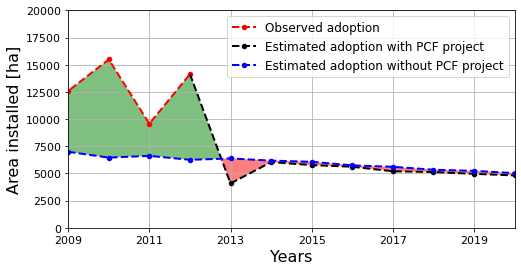

In [34]:
title = "Differential yearly SBP adoption in Portugal"
plot_differential_adoption(yearly_adoption_portugal_pred, yearly_adoption_portugal_pred_nop,
                            yearly_adoption_portugal_real, 20000, title, confidence=0.95)